In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [91]:
df = pd.read_csv('../data/full_gross.csv', index_col='Unnamed: 0')

In [92]:
df.head()

,averagerating,numvotes,title,genres,Sport,Fantasy,Mystery,War,Biography,Drama,...,Documentary,Sci-Fi,Action,Thriller,Music,Animation,year,dom_gross,for_gross,world_gross
0,4.2,50352,The Legend of Hercules,"Action,Adventure,Fantasy",False,True,False,False,False,False,...,False,False,True,False,False,False,2014,18800000.0,42400000.0,61200000.0
1,5.1,8296,Baggage Claim,Comedy,False,False,False,False,False,False,...,False,False,False,False,False,False,2013,21600000.0,887000.0,22487000.0
3,7.6,326657,Moneyball,"Biography,Drama,Sport",True,False,False,False,True,True,...,False,False,False,False,False,False,2011,75600000.0,34600000.0,110200000.0
4,6.5,87288,Hereafter,"Drama,Fantasy,Romance",False,True,False,False,False,True,...,False,False,False,False,False,False,2010,32700000.0,72500000.0,105200000.0
5,7.4,428142,Mission: Impossible - Ghost Protocol,"Action,Adventure,Thriller",False,False,False,False,False,False,...,False,False,True,True,False,False,2011,209400000.0,485300000.0,694700000.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2966 entries, 0 to 2982
Data columns (total 27 columns):
averagerating    2966 non-null float64
numvotes         2966 non-null int64
title            2966 non-null object
genres           2966 non-null object
Sport            2966 non-null bool
Fantasy          2966 non-null bool
Mystery          2966 non-null bool
War              2966 non-null bool
Biography        2966 non-null bool
Drama            2966 non-null bool
Comedy           2966 non-null bool
History          2966 non-null bool
Crime            2966 non-null bool
Horror           2966 non-null bool
Family           2966 non-null bool
Adventure        2966 non-null bool
Romance          2966 non-null bool
Documentary      2966 non-null bool
Sci-Fi           2966 non-null bool
Action           2966 non-null bool
Thriller         2966 non-null bool
Music            2966 non-null bool
Animation        2966 non-null bool
year             2966 non-null int64
dom_gross        296

In [94]:
low_votes = df[(df['numvotes'] > 250000) | (df['numvotes'] < 1000)].index
df2 = df.drop(low_votes)

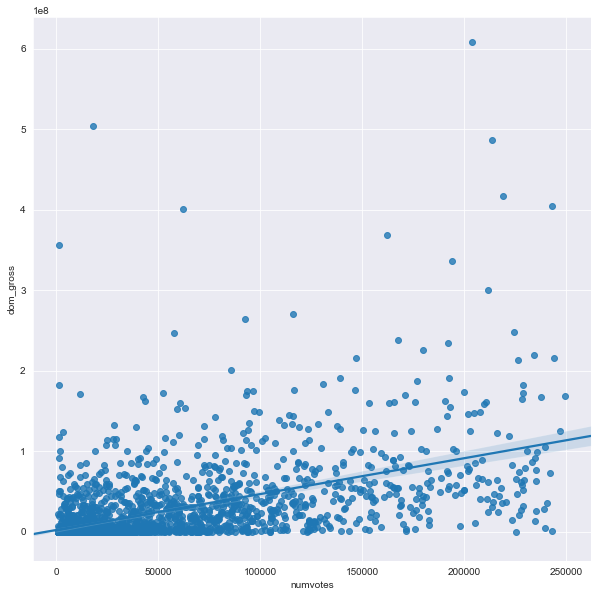

In [95]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x=df2["numvotes"], y=df2["dom_gross"], fit_reg=True)



In [96]:
df.loc[df['dom_gross'] == df['dom_gross'].max()]

,averagerating,numvotes,title,genres,Sport,Fantasy,Mystery,War,Biography,Drama,...,Documentary,Sci-Fi,Action,Thriller,Music,Animation,year,dom_gross,for_gross,world_gross
144,6.1,43,Avatar,Horror,False,False,False,False,False,False,...,False,False,False,False,False,False,2009,760507625.0,2.015838e+09,2.776345e+09


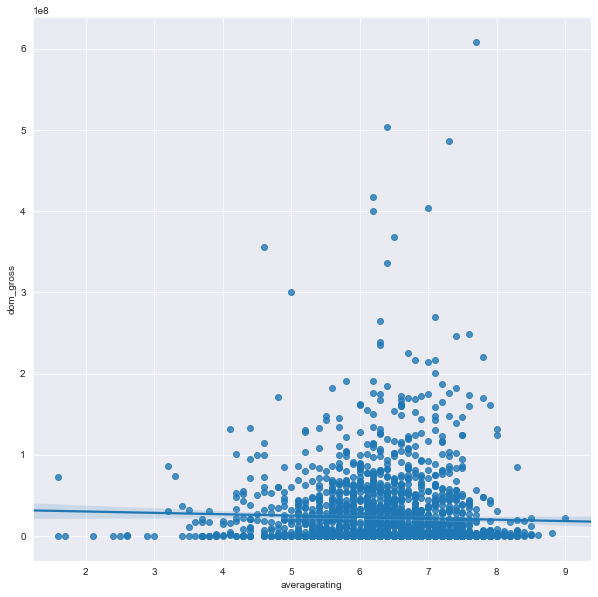

In [97]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x=df2["averagerating"], y=df2["dom_gross"], fit_reg=True)

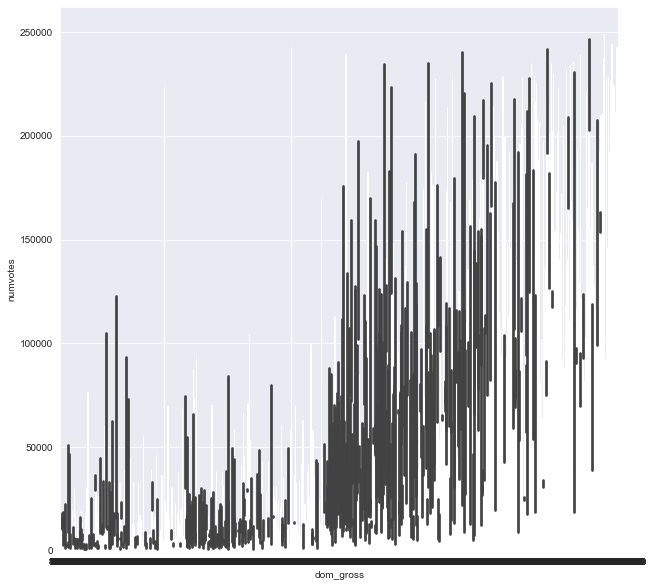

In [138]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df2["dom_gross"], y=df2["numvotes"])

In [99]:
table1 = pd.pivot_table(df, index=['genres'], values ='dom_gross', aggfunc=['mean','median','std','count'])
table1 = pd.DataFrame(table1)
table1.columns = table1.columns.to_series().str.join('_')
table1 = pd.DataFrame(table1.sort_values('median_dom_gross', ascending=False))
table1 = pd.DataFrame(table1.loc[table1['count_dom_gross']>9].reset_index())
table1.columns = ['genres', 'mean_dom_gross', 'median_dom_gross',
       'std_dom_gross', 'count_dom_gross']
table1[['genres', 'mean_dom_gross', 'median_dom_gross','std_dom_gross','count_dom_gross']].head()

/Users/stuartmurphy/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:42: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


,genres,mean_dom_gross,median_dom_gross,std_dom_gross,count_dom_gross
0,"Action,Adventure,Sci-Fi",2.268026e+08,157100000.0,1.812721e+08,56
1,"Adventure,Family,Fantasy",1.483963e+08,104400000.0,9.624409e+07,13
2,"Adventure,Animation,Comedy",1.168972e+08,85900000.0,1.053888e+08,79
3,"Action,Adventure,Thriller",1.053763e+08,77200000.0,8.856918e+07,17
4,"Action,Adventure,Fantasy",1.313861e+08,72688614.0,1.368468e+08,37


In [100]:
table2 = pd.DataFrame(table1.sort_values('mean_dom_gross', ascending=False))

In [101]:
top5_mean = table2.iloc[:5]

In [102]:
top5_median = table1.iloc[:5]

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

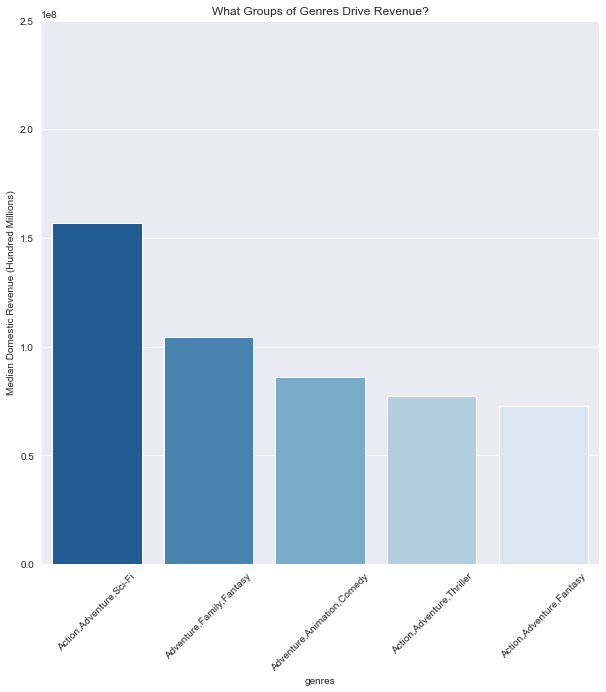

In [153]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=top5_median["genres"], y=top5_median["median_dom_gross"], palette='Blues_r')
plt.ylim(0, 250000000.00)
plt.ylabel('Median Domestic Revenue (Hundred Millions)')
plt.title('What Groups of Genres Drive Revenue?')
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

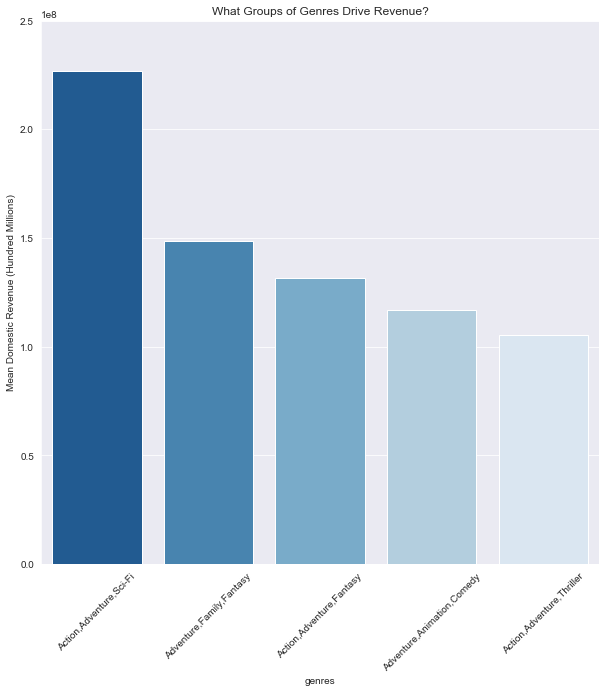

In [152]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=top5_mean["genres"], y=top5_mean["mean_dom_gross"], palette='Blues_r')
plt.ylim(0, 250000000.00)
plt.ylabel('Mean Domestic Revenue (Hundred Millions)')
plt.title('What Groups of Genres Drive Revenue?')
plt.xticks(rotation=45)

In [105]:
def genre_descriptive_stats(df, key_col): #key_column will be what we want to run descriptive stats on
    mean = np.ndarray(0)
    median = np.ndarray(0)
    std = np.ndarray(0)

    df_columns_to_use = df.columns[4:-5] #change this as needed

    for i, genre in enumerate(df_columns_to_use):
        mean = np.append(mean, df[key_col].loc[df[genre]].mean())
        median = np.append(median, df[key_col].loc[df[genre]].median())
        std = np.append(std, df[key_col].loc[df[genre]].std())
    d1 = np.append([mean], [median], axis=0)
    d2 = np.append(d1, [std], axis=0)
    d3 = np.transpose(d2)
    descr_stats_df = pd.DataFrame(data=d3, columns=['mean', 'median', 'standard_deviation'], index=list(df_columns_to_use))
    return descr_stats_df

In [106]:
genre_descriptive_stats(df, 'averagerating')

,mean,median,standard_deviation
Sport,6.814894,7.00,1.177133
Fantasy,6.219126,6.30,0.827093
Mystery,6.279426,6.30,1.005374
War,6.776786,7.05,0.913135
Biography,6.995406,7.00,0.674100
Drama,6.588830,6.70,0.886704
Comedy,6.254343,6.30,0.971089
History,6.848462,7.00,0.905387
Crime,6.447135,6.50,0.902704
Horror,5.725862,5.80,0.962556


In [107]:
genre_descriptive_stats(df, 'numvotes')

,mean,median,standard_deviation
Sport,54084.170213,27389.0,86810.724426
Fantasy,111181.497268,58455.0,145709.940361
Mystery,87238.598086,34151.0,143143.916389
War,32087.125000,8752.5,66387.676166
Biography,60696.883392,16099.0,124378.411689
Drama,51645.156619,13312.0,104549.467883
Comedy,58750.284958,22265.5,97984.298475
History,43741.307692,10525.0,95651.884950
Crime,77169.713542,33625.0,117729.596350
Horror,58981.556034,33674.5,76402.826590


In [108]:
dom_gross_stats = genre_descriptive_stats(df, 'dom_gross')

In [131]:
top_5_median_dom_gross = dom_gross_stats.sort_values('median', ascending=False)
top_5_median_dom_gross = top_5_median_dom_gross.iloc[:5]
top_5_median_dom_gross

,mean,median,standard_deviation
Adventure,1.001179e+08,55750000.0,1.257571e+08
Sci-Fi,1.114231e+08,54600000.0,1.481256e+08
Family,6.058833e+07,33600000.0,7.682623e+07
Action,6.423289e+07,24300000.0,1.049320e+08
Fantasy,6.098293e+07,22500000.0,9.865756e+07


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

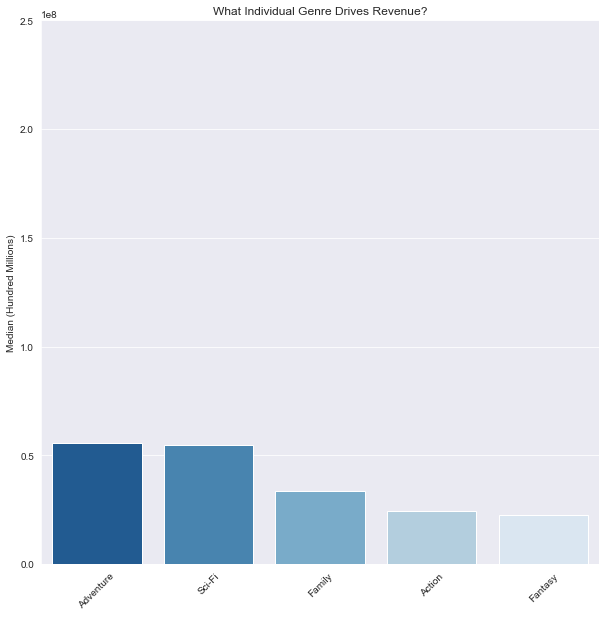

In [149]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=top_5_median_dom_gross.index, y=top_5_median_dom_gross["median"], palette='Blues_r')
plt.ylim(0, 250000000.00)
plt.ylabel('Median (Hundred Millions)')
plt.title('What Individual Genre Drives Revenue?')
plt.xticks(rotation=45)

In [132]:
top_5_mean_dom_gross = dom_gross_stats.sort_values('mean', ascending=False)
top_5_mean_dom_gross = top_5_mean_dom_gross.iloc[:5]
top_5_mean_dom_gross

,mean,median,standard_deviation
Sci-Fi,1.114231e+08,54600000.0,1.481256e+08
Adventure,1.001179e+08,55750000.0,1.257571e+08
Action,6.423289e+07,24300000.0,1.049320e+08
Fantasy,6.098293e+07,22500000.0,9.865756e+07
Family,6.058833e+07,33600000.0,7.682623e+07


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

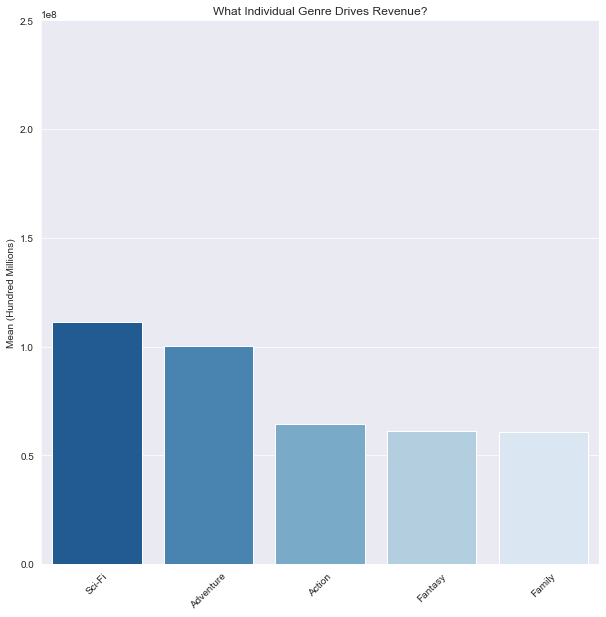

In [154]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=top_5_mean_dom_gross.index, y=top_5_mean_dom_gross["mean"], palette='Blues_r')
plt.ylim(0, 250000000.00)
plt.ylabel('Mean (Hundred Millions)')
plt.title('What Individual Genre Drives Revenue?')
plt.xticks(rotation=45)

In [155]:
bottom_5_std_dom_gross = dom_gross_stats.sort_values('standard_deviation', ascending=True)
bottom_5_std_dom_gross = bottom_5_std_dom_gross.iloc[:5]
bottom_5_std_dom_gross

,mean,median,standard_deviation
War,1.114884e+07,726500.0,2.560064e+07
Documentary,1.400771e+07,613500.0,3.332762e+07
History,1.568500e+07,1150000.0,3.652819e+07
Romance,1.721781e+07,1300000.0,3.811735e+07
Drama,1.879528e+07,1500000.0,4.036670e+07


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

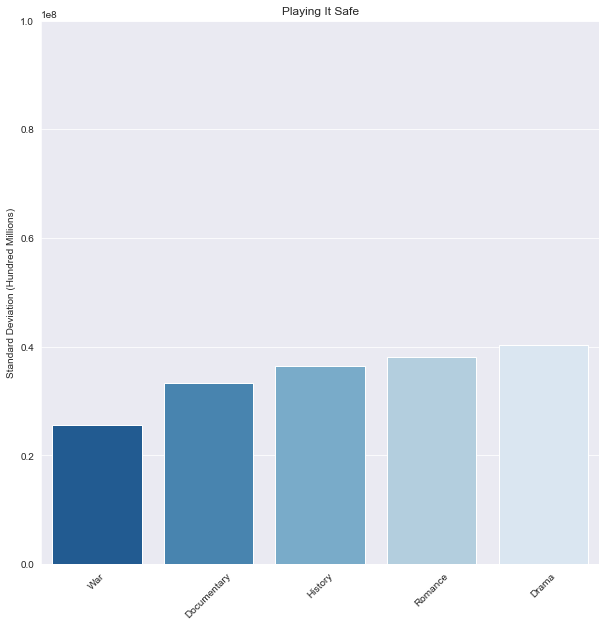

In [156]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=bottom_5_std_dom_gross.index, y=bottom_5_std_dom_gross["standard_deviation"], palette='Blues_r')
plt.ylim(0, 100000000.00)
plt.ylabel('Standard Deviation (Hundred Millions)')
plt.title('Playing It Safe')
plt.xticks(rotation=45)

In [113]:
df_dom_gross_asc = df.sort_values('dom_gross', ascending=False)

In [116]:
table_top_10_dom = df_dom_gross_asc.iloc[:10]

In [117]:
table_top_10_dom

,averagerating,numvotes,title,genres,Sport,Fantasy,Mystery,War,Biography,Drama,...,Documentary,Sci-Fi,Action,Thriller,Music,Animation,year,dom_gross,for_gross,world_gross
144,6.1,43,Avatar,Horror,False,False,False,False,False,False,...,False,False,False,False,False,False,2009,760507625.0,2.015838e+09,2.776345e+09
462,7.3,516148,Black Panther,"Action,Adventure,Sci-Fi",False,False,False,False,False,False,...,False,True,True,False,False,False,2018,700100000.0,6.469000e+08,1.347000e+09
2926,8.5,670926,Avengers: Infinity War,"Action,Adventure,Sci-Fi",False,False,False,False,False,False,...,False,True,True,False,False,False,2018,678800000.0,NaN,NaN
1360,6.2,20,Titanic,Adventure,False,False,False,False,False,False,...,False,False,False,False,False,False,1997,659363944.0,1.548844e+09,2.208208e+09
373,7.0,539338,Jurassic World,"Action,Adventure,Sci-Fi",False,False,False,False,False,False,...,False,True,True,False,False,False,2015,652300000.0,NaN,NaN
1939,8.1,1183655,The Avengers,"Action,Adventure,Sci-Fi",False,False,False,False,False,False,...,False,True,True,False,False,False,2012,623279547.0,8.946564e+08,1.517936e+09
307,7.1,462903,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",False,True,False,False,False,False,...,False,False,True,False,False,False,2017,620200000.0,7.124000e+08,1.332600e+09
1967,7.7,203510,Incredibles 2,"Action,Adventure,Animation",False,False,False,False,False,False,...,False,False,True,False,False,True,2018,608600000.0,6.342000e+08,1.242800e+09
2772,7.8,478592,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",False,False,False,False,False,False,...,False,True,True,False,False,False,2016,532200000.0,5.239000e+08,1.056100e+09
1872,6.4,18100,Beauty and the Beast,"Drama,Fantasy,Romance",False,True,False,False,False,True,...,False,False,False,False,False,False,2017,504014165.0,7.551855e+08,1.259200e+09


In [127]:
pd.DataFrame(table_top_10_dom, columns=('title','genres','dom_gross'))

,title,genres,dom_gross
144,Avatar,Horror,760507625.0
462,Black Panther,"Action,Adventure,Sci-Fi",700100000.0
2926,Avengers: Infinity War,"Action,Adventure,Sci-Fi",678800000.0
1360,Titanic,Adventure,659363944.0
373,Jurassic World,"Action,Adventure,Sci-Fi",652300000.0
1939,The Avengers,"Action,Adventure,Sci-Fi",623279547.0
307,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",620200000.0
1967,Incredibles 2,"Action,Adventure,Animation",608600000.0
2772,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",532200000.0
1872,Beauty and the Beast,"Drama,Fantasy,Romance",504014165.0
